# Exploração do dataset da Agrisolus
---
### Autor: Alexandre Marcondes

**Objetivo 1**: aplicar o algoritmo de decision tree para realizar uma regressão linear nos dados da Agrisolus.

**Objetivo 2**: aplicar a regularização no modelo.



### Bibliotecas

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

### Arquivo csv

In [2]:
path = './agrisolus_ml_dias/'

agri1 = 'agrisolus_dias.csv'

pesos = pd.read_csv(path+agri1, sep=';')

In [3]:
print('Pesos:')
print(pesos.shape)
print(pesos.head())

Pesos:
(2075588, 16)
   Unnamed: 0                 Data     Peso  Umidade  Temperatura  idLote  \
0           0  2019-04-06 07:10:35  20.5748      0.0          0.0       2   
1           1  2019-04-06 07:10:43  42.5538     68.2         32.1       2   
2           2  2019-04-06 07:10:58  33.6798     67.9         32.1       2   
3           3  2019-04-06 07:12:12  25.7238     68.6         32.1       2   
4           4  2019-04-06 07:13:19  39.4938     68.8         32.0       2   

   idLinhagem  idBalanca       DataAlojamento                     Sexo  \
0          15    2843900  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
1          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
2          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
3          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   
4          15    2861839  2019-04-06 06:30:00  Fêmeas Cobb MV GT Foods   

   PesoChegada            DataAbate  Idade  idPesoEsperado  PesoEsperad

In [4]:
pesos.drop('Unnamed: 0', axis=1,inplace=True)

### Explorando o dataset

In [5]:
pesos.idLote.value_counts()

2    1091059
1     984529
Name: idLote, dtype: int64


Como são dois lotes presentes nos dados, os lotes serão analisados separadamente.

Para a construção do modelo preditivo, todos os dados foram considerados somente a partir do dia 3 de idade.


Text(0.5, 0, 'Idade')

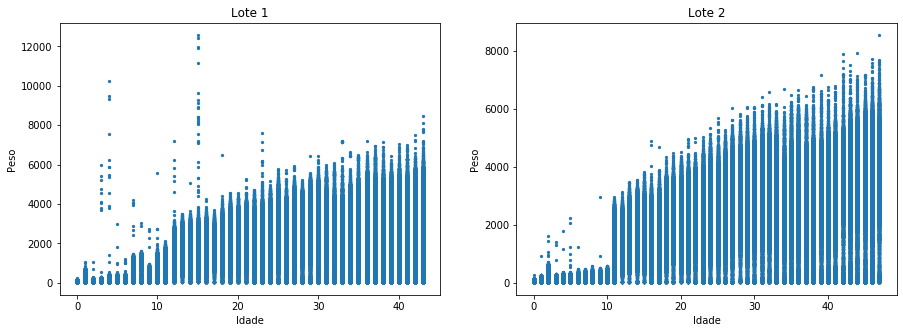

In [6]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
# plot do lote 1
axs[0].scatter(x=pesos[pesos.idLote==1].Idade,y=pesos[pesos.idLote==1].Peso, s=5)
axs[0].set_title('Lote 1')
axs[0].set_ylabel('Peso')
axs[0].set_xlabel('Idade')
# Plot do lote 2
axs[1].scatter(x=pesos[pesos.idLote==2].Idade,y=pesos[pesos.idLote==2].Peso, s=5)
axs[1].set_title('Lote 2')
axs[1].set_ylabel('Peso')
axs[1].set_xlabel('Idade')

### Tentativa de modelagem com decision tree
---

In [7]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['agg.path.chunksize'] = 10000

#### Modelo para o lote 1

In [8]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade']]
y = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(779803, 1) (137613, 1)
(779803, 1) (137613, 1)


In [9]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.4484733170259284


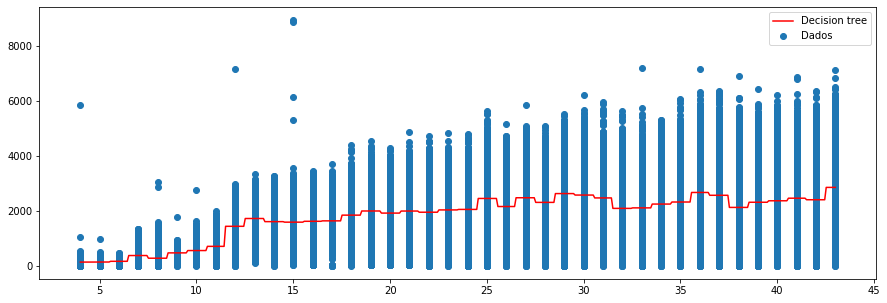

In [11]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])

#### Modelo para o lote 2

In [12]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==2) & (pesos.Idade>3)].loc[:,['Idade']]
y = pesos[(pesos.idLote==2) & (pesos.Idade>3)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(865919, 1) (152810, 1)
(865919, 1) (152810, 1)


In [13]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.5307148562643527


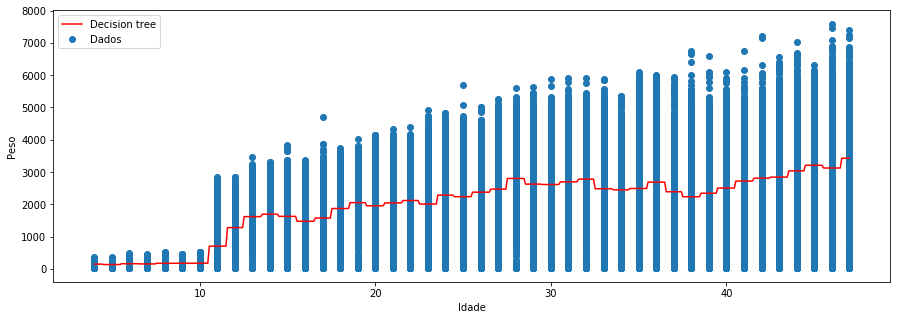

In [15]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')
axis.legend(['Decision tree','Dados'])

### Melhoria dos dados
---

Exclusão de valores que variam abruptamente.

Valores que tenham diferença maior a 10, em relação ao valor esperado, serão excluídos.


In [16]:
peso_corrigido = pesos[(pesos.DiffPeso<100) & (pesos.DiffPeso>-100)]

In [17]:
peso_corrigido.shape

(533598, 15)

In [18]:
peso_corrigido.head()

,Data,Peso,Umidade,Temperatura,idLote,idLinhagem,idBalanca,DataAlojamento,Sexo,PesoChegada,DataAbate,Idade,idPesoEsperado,PesoEsperado,DiffPeso
0,2019-04-06 07:10:35,20.5748,0.0,0.0,2,15,2843900,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,1335,42.0,-21.4252
1,2019-04-06 07:10:43,42.5538,68.2,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,1335,42.0,0.5538
2,2019-04-06 07:10:58,33.6798,67.9,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,1335,42.0,-8.3202
3,2019-04-06 07:12:12,25.7238,68.6,32.1,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,1335,42.0,-16.2762
4,2019-04-06 07:13:19,39.4938,68.8,32.0,2,15,2861839,2019-04-06 06:30:00,Fêmeas Cobb MV GT Foods,38.0,2019-05-25 09:30:00,0,1335,42.0,-2.5062


Text(0.5, 0, 'Idade')

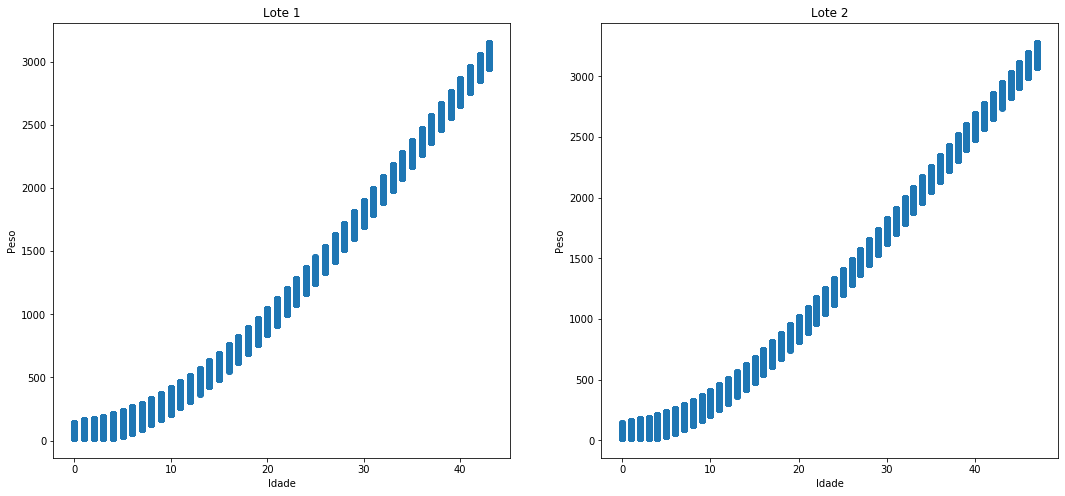

In [19]:
fig, axs = plt.subplots(1,2, figsize=(18,8))
# plot do lote 1
axs[0].scatter(x=peso_corrigido[peso_corrigido.idLote==1].Idade,y=peso_corrigido[peso_corrigido.idLote==1].Peso)
axs[0].set_title('Lote 1')
axs[0].set_ylabel('Peso')
axs[0].set_xlabel('Idade')
# Plot do lote 2
axs[1].scatter(x=peso_corrigido[peso_corrigido.idLote==2].Idade,y=peso_corrigido[peso_corrigido.idLote==2].Peso)
axs[1].set_title('Lote 2')
axs[1].set_ylabel('Peso')
axs[1].set_xlabel('Idade')

#### Modelagem para o lote 1

In [20]:
# Regressão será feita considerando somente o lote 1
X = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Idade']]
y = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(155385, 1) (27422, 1)
(155385, 1) (27422, 1)


In [21]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.9966920716507064


Text(0, 0.5, 'Peso')

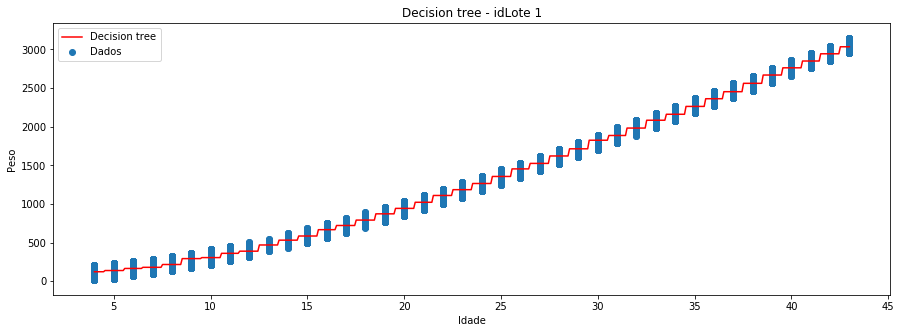

In [23]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])
axis.set_title('Decision tree - idLote 1')
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')

#### Modelagem para o lote 2

In [24]:
# Regressão será feita considerando somente o lote 1
X = peso_corrigido[(peso_corrigido.idLote==2) & (pesos.Idade>3)].loc[:,['Idade']]
y = peso_corrigido[(peso_corrigido.idLote==2) & (pesos.Idade>3)].loc[:,['Peso']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

C:\Users\alexandre_marcondes\Miniconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(189229, 1) (33394, 1)
(189229, 1) (33394, 1)


C:\Users\alexandre_marcondes\Miniconda3\envs\python_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
y_tree = tree.predict(T)

R2:  0.9975857933178234


Text(0, 0.5, 'Peso')

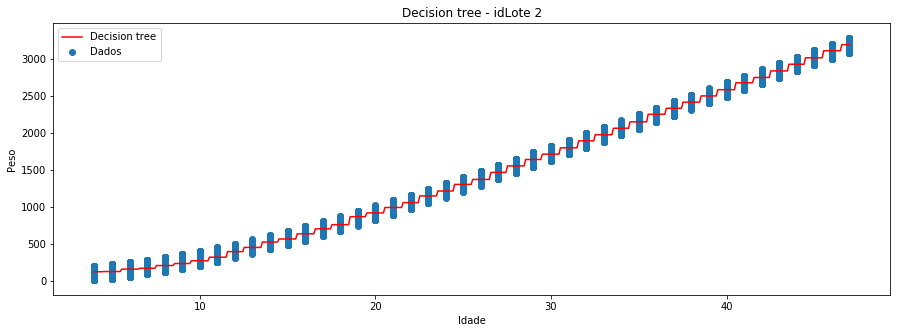

In [27]:
print('R2: ', r2_score(y_test,tree.predict(X_test)))

fig,axis = plt.subplots(figsize=(15,5))
axis.plot(T,y_tree, color='r')
axis.scatter(X_test,y_test)
axis.legend(['Decision tree','Dados'])
axis.set_title('Decision tree - idLote 2')
axis.set_xlabel('Idade')
axis.set_ylabel('Peso')

### Consideração de outras features no modelo
---
O modelo melhora caso outras features sejam adicionadas no atributos de classificação?

#### Lote 1 - considerando os dados sem correção

In [28]:
# Regressão será feita considerando somente o lote 1
X1 = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade']]
X2 = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade','Umidade']]
X3 = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade','Temperatura']]
X4 = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade','Umidade','Temperatura']]
X5 = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Umidade','Temperatura']]

y = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Peso']]

In [29]:
# Considerando somente a idade
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X1_train,y_train)
y_pred_1 = tree.predict(X1_test)
R2_1 = r2_score(y_test,y_pred_1)
# Considerando idade e umidade
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X2_train,y_train)
y_pred_2 = tree.predict(X2_test)
R2_2 = r2_score(y_test,y_pred_2)
# Considerando idade e temperatura
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X3_train,y_train)
y_pred_3 = tree.predict(X3_test)
R2_3 = r2_score(y_test,y_pred_3)
# Considerando idade, umidade e temperatura
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X4_train,y_train)
y_pred_4 = tree.predict(X4_test)
R2_4 = r2_score(y_test,y_pred_4)
# Considerando umidade e temperatura
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X5_train,y_train)
y_pred_5 = tree.predict(X5_test)
R2_5 = r2_score(y_test,y_pred_5)

In [30]:
print('R2 (Idade): ', R2_1)
print('R2 (Idade, umidade): ', R2_2)
print('R2 (Idade, temperatura): ', R2_3)
print('R2 (Idade, umidade, temperatura): ', R2_4)
print('R2 (Umidade, temperatura): ', R2_5)

R2 (Idade):  0.44729090815675154
R2 (Idade, umidade):  0.5197855031987506
R2 (Idade, temperatura):  0.5358043970523446
R2 (Idade, umidade, temperatura):  0.6983811146341992
R2 (Umidade, temperatura):  0.5043802507945543


#### Lote 1 - considerando os dados corrigidos

In [31]:
# Regressão será feita considerando somente o lote 1
X1 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Idade']]
X2 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Idade','Umidade']]
X3 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Idade','Temperatura']]
X4 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Idade','Umidade','Temperatura']]
X5 = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Umidade','Temperatura']]

y = peso_corrigido[(peso_corrigido.idLote==1) & (peso_corrigido.Idade>3)].loc[:,['Peso']]

In [32]:
# Considerando somente a idade
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X1_train,y_train)
y_pred_1 = tree.predict(X1_test)
R2_1 = r2_score(y_test,y_pred_1)
# Considerando idade e umidade
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X2_train,y_train)
y_pred_2 = tree.predict(X2_test)
R2_2 = r2_score(y_test,y_pred_2)
# Considerando idade e temperatura
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X3_train,y_train)
y_pred_3 = tree.predict(X3_test)
R2_3 = r2_score(y_test,y_pred_3)
# Considerando idade, umidade e temperatura
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X4_train,y_train)
y_pred_4 = tree.predict(X4_test)
R2_4 = r2_score(y_test,y_pred_4)
# Considerando idade, umidade e temperatura
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.15, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X5_train,y_train)
y_pred_5 = tree.predict(X5_test)
R2_5 = r2_score(y_test,y_pred_5)

In [33]:
print('R2 (Idade): ', R2_1)
print('R2 (Idade, umidade): ', R2_2)
print('R2 (Idade, temperatura): ', R2_3)
print('R2 (Idade, umidade, temperatura): ', R2_4)
print('R2 (umidade, temperatura): ', R2_5)

R2 (Idade):  0.9967400455135645
R2 (Idade, umidade):  0.9970037342084115
R2 (Idade, temperatura):  0.9970771561190088
R2 (Idade, umidade, temperatura):  0.9972265848660404
R2 (umidade, temperatura):  0.888116783602658


### Conclusões

* Os dados de variação de peso não fazem tanto sentido, pois há variações muito grandes no peso de aves do mesmo lote no mesmo dia.
* Uma correção foi aplicada aos dados, excluindo variações diárias de peso acima de 100 g.
* Com a correção dos dados, há uma aproximação dos dados em relação a curva teórica da variação do peso de uma ave.
* A adição de outras features não alteram o R2 obtido utilizando os dados corrigidos. A utilização da idade é suficiente.
* Como os atributos de temperatura e umidade possuem baixa correlação, há uma queda no valor do R2 ao utilizar somente esses dois atributos.

# Continuação...

# Regularização da regressão

Aqui será realizada a regularização através da "poda" da árvore de decisão

Serão utilizados os dados do lote 1, considerando somente um atributo para melhor visualização do resultado.

In [49]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade']]
y = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Peso']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [50]:
# Modelo com regularização
depth_test =  np.linspace(1, 100, 100)
erros_train = []
erros_test = []
for depth in depth_test:
    tree_reg =  DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_pred_reg = tree_reg.predict(X_test)
    erros_train.append(r2_score(y_train, tree_reg.predict(X_train)))
    erros_test.append(r2_score(y_test,y_pred_reg))
    last_r2 = r2_score(y_test, y_pred_reg)
    #erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    #erros_test.append(mean_squared_error(y_test, y_pred))
    #lastMSE=mean_squared_error(y_test, y_pred)
    
# Modelo sem regularização
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred)

# Modelo com profundidade máxima igual a 1
tree_dep1 = DecisionTreeRegressor(max_depth=1)
tree_dep1.fit(X_train, y_train)
y_pred_dep1 = tree_dep1.predict(X_test)
r2_tree_dep1 = r2_score(y_test, y_pred_dep1)

########################
R2 - Sem regularização: 
0.4438843011058645
R2 - Com regularização:
0.4438843011058645
R2 - Produndidade igual a 1:
0.37039869725197083
########################


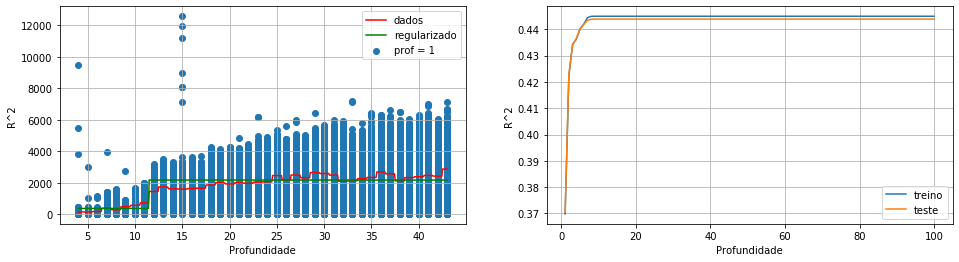

In [57]:
print('########################')
print('R2 - Sem regularização: ')
print(r2_tree)
print('R2 - Com regularização:')
print(last_r2)
print('R2 - Produndidade igual a 1:')
print(r2_tree_dep1)
print('########################')

fig, axs = plt.subplots(1,2,figsize=(16,4))
# plot da regressão
axs[0].scatter(X_test,y_test)
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
axs[0].plot(T,tree.predict(T),color='r')
T = np.linspace(min(X_test.values.ravel()), max(X_test.values.ravel()), 500)[:,np.newaxis]
axs[0].plot(T,tree_dep1.predict(T),color='g')
axs[0].set_xlabel('Profundidade')
axs[0].set_ylabel('R^2')
axs[0].legend(['dados','regularizado','prof = 1'])
axs[0].grid('on')
# Variação do R2 com a profundidade
axs[1].plot(depth_test,erros_train)
axs[1].plot(depth_test,erros_test)
axs[1].set_xlabel('Profundidade')
axs[1].set_ylabel('R^2')
axs[1].legend(['treino','teste'])
axs[1].grid('on')


Aparentemente o algoritmo de decision tree do Sklearn realiza a "poda" automaticamente.

Documentação do sklearn sobre o assunto:

*max_depth: int, default=None*

*The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample*



---
Considerando agora os três atributos.

---

In [58]:
# Regressão será feita considerando somente o lote 1
X = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Idade','Umidade','Temperatura']]
y = pesos[(pesos.idLote==1) & (pesos.Idade>3)].loc[:,['Peso']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

In [59]:
# Modelo com regularização
depth_test =  np.linspace(1, 100, 100)
erros_train = []
erros_test = []
for depth in depth_test:
    tree_reg =  DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_pred_reg = tree_reg.predict(X_test)
    erros_train.append(r2_score(y_train, tree_reg.predict(X_train)))
    erros_test.append(r2_score(y_test,y_pred_reg))
    last_r2 = r2_score(y_test, y_pred_reg)
    #erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    #erros_test.append(mean_squared_error(y_test, y_pred))
    #lastMSE=mean_squared_error(y_test, y_pred)
    
# Modelo sem regularização
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred)

# Modelo com profundidade máxima igual a 1
tree_dep1 = DecisionTreeRegressor(max_depth=1)
tree_dep1.fit(X_train, y_train)
y_pred_dep1 = tree_dep1.predict(X_test)
r2_tree_dep1 = r2_score(y_test, y_pred_dep1)

########################
R2 - Sem regularização: 
0.6992305883935449
R2 - Com regularização:
0.699039837180345
R2 - Produndidade igual a 1:
0.36820609141267024
########################


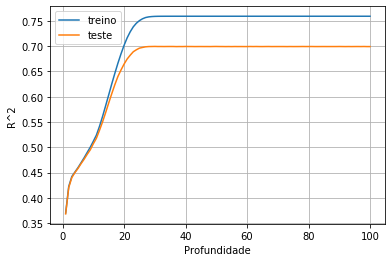

In [60]:
print('########################')
print('R2 - Sem regularização: ')
print(r2_tree)
print('R2 - Com regularização:')
print(last_r2)
print('R2 - Produndidade igual a 1:')
print(r2_tree_dep1)
print('########################')

fig,axs = plt.subplots()
axs.plot(depth_test,erros_train)
axs.plot(depth_test,erros_test)
axs.set_xlabel('Profundidade')
axs.set_ylabel('R^2')
axs.legend(['treino','teste'])
axs.grid('on')